# STA 141B Assignment 1

Due __January 26, 2024__ by __11:59pm__. Submit your work by uploading it to Gradescope through Canvas.

Instructions:

1. Provide your solutions in new cells following each exercise description. Create as many new cells as necessary. Use code cells for your Python scripts and Markdown cells for explanatory text or answers to non-coding questions. Answer all textual questions in complete sentences.
2. The use of assistive tools is permitted, but must be indicated. You will be graded on you proficiency in coding. Produce high quality code by adhering to proper programming principles. 
3. Export the .jpynb as .pdf and submit it on Gradescope in time. To facilitate grading, indicate the area of the solution on the submission. Submissions without indication will be marked down. No late submissions accepted. 
4. The total number of points is 10. 

__Exercise 1__

This exercise will review basic concepts of programming. Only use pure python code and no methods (like `str.find`) that are optimized in, e.g., `C`. Likewise, do not use any packages except those suitable for parallelization in part (c). 



__(a)__ Write a recursive function `seq_count(x, ...)` that returns length of the longest subsequence of identical elements in the sequence object `x`. Run: 
```
seq_count([[1], [1], [1], 1, 3, 3, 2, 2, 4, 0])
seq_count(('G', 'g', 'a', "a", "a", '''a''', 2, 's', 's'))
seq_count([3, 1, int(True), 1, 1, 1, 3, 3])
seq_count((1, 3, None, 3, 3, 1, 3, 3, 4, 0))
```

In [1]:
def seq_count(x, index=0, count=0,longest_count=0):
    if index==len(x):
        return max(count, longest_count)
    elif x[index-1] is x[index]:
        return seq_count(x, index+1, count+1, longest_count)
    else:
        return seq_count(x, index+1, 1, max(count, longest_count))
    



In [2]:
seq_count([[1], [1], [1], 1, 3, 3, 2, 2, 4, 0])


2

In [3]:
seq_count(('G', 'g', 'a', "a", "a", '''a''', 2, 's', 's'))


4

In [4]:
seq_count([3, 1, int(True), 1, 1, 1, 3, 3])


5

In [5]:
seq_count((1, 3, None, 3, 3, 1, 3, 3, 4, 0))

2

In [6]:
seq_count([1, 3, 1, 1, 3, 3, 4, 4, 4])

3

In [7]:
seq_count((1, 3, 1, 1, 1, '1', 1, [3, 3, 3, 3], 3, 4, 0))

3

__(b)__ Write a function `pattern_count(x, pattern, ...)` that takes the two iterable objects `x` and `pattern` and returns the length of the longest subsequence of `pattern`. Run: 
```
pattern_count('CGGACTACTAGACT', 'ACT')
pattern_count((1, (1, 1, 1, 1), 2, 1, 1, 1), [1, 1])
pattern_count(['ab', 'ab', 'a', 'a', 'b'], ('ab',))
```

In [8]:
def pattern_count(x, pattern):
    pattern = tuple(pattern)
    max_count = 0
    # stores the max count of consecutive patterns
    count = 0
    # current count of the pattern
    i = 0
    # index

    while i <= len(x) - len(pattern):
        # goes through the lust
        if tuple(x[i:i+len(pattern)]) == pattern:
            # checks if  slice matches the pattern
            count += 1
            # increament count for  match
            i += len(pattern)
            # advances the index by the patterns length
        else:
            max_count = max(max_count, count)
            # update max_count if neccessary
            count = 0
            # reset the current count
            i += 1
            # move to the next element

    max_count = max(max_count, count)
    # final check for the last counted sequence

    return max_count
    # return the longest consecutive pattern sequence


In [9]:
pattern_count('CGGACTACTAGACT', 'ACT')

2

In [10]:
pattern_count((1, (1, 1, 1, 1), 2, 1, 1, 1), [1, 1])

1

In [11]:
pattern_count(['ab', 'ab', 'a', 'a', 'b'], ('ab',))

2

In [12]:
pattern_count([0, 1, 2, 1, 2, 3, 1, 2, 1, 2, 1, 2, 4, 1, 2], (1, 2))
#3

3

In [13]:
pattern_count([], [2])
#0

0

In [14]:
pattern_count(['ab', 'ab', 'a', 'a', 'b'], 'ab') # elements in pattern must be identical to elements in x! 
#1

1

__(c)__ For a long string, write code that takes strings `x`, `pattern`, and an integer `n_splits`, and uses a suitable concurrency method to search for repeating patterns using `pattern_count` from (b). 
To this end, partition `x` into `n_splits` parts and search each of them individually. Make sure not to split where a pattern is present! Run: 
```
from random import choices, seed

seed(2024)
x = "".join(choices('01', k = 5_000))
pattern = "01"
n_splits = 50

# here is your code 
```

_Hint: You can use the fast `x.find(pattern)` to check your code._

In [15]:
from random import choices, seed
import concurrent.futures

seed(2024)
x = "".join(choices('01', k = 5_000))
pattern = "01"
n_splits = 50

def search_patterns_concurrently(x, pattern, n_splits):
    partitions = []

    split_index = []
    for split in range(0, len(x), len(x)//n_splits):
        split_index.append(split)

    for check in range(1, len(split_index)):
        case = 0
        while case < len(pattern):
            if x[split_index[check]+case-len(pattern):split_index[check]+case] != pattern:
                case +=1
            else:
                case=0
                split_index[check] += len(pattern)

    index=0
    while index < len(split_index)-1:
        partitions.append(x[split_index[index]:split_index[index+1]])
        index+=1
    partitions.append(x[split_index[-1]:])

    with concurrent.futures.ThreadPoolExecutor() as executor:

        futures = [executor.submit(pattern_count, part, pattern) for part in partitions]

        concurrent.futures.wait(futures)

        results = [future.result() for future in futures]

    return max(results)

search_patterns_concurrently(x, pattern, n_splits)

7

In [16]:
x.find(pattern)

0

__Exercise 2__

In this exercise, we will generate (pseudo-)random numbers using the inversion and accept-reject method. In order to generate the random numbers you are only allowed draw from the Uniform distribution and use
```
from random import uniform
from scipy.special import binom
from numpy import sqrt, pi, exp, tan, cumsum
from scipy.stats import probplot
import pandas as pd
import matplotlib.pyplot as plt
```

_Inversion method: Let $F$ be a distribution function from which we want to draw. Define the quantile function $F^{-1}(u) = \inf\{x\colon F(x)\geq u, 0\leq u\leq 1\}$. Then, if $U\sim Unif[0,1]$, $F^{-1}(U)$ has distribution function $F$._

_Accept-reject: Let $f$ be a density function from which we want to draw and there exists a density $g$ from which we can draw (e.g., via the inversion method) and for which there exists a constant $c$ such that $f(x)\leq cg(x)$ for all $x$. The following algorithm generates a random variable $X$ with density function $f$._

1. Generate a random variable $X$ from density $g$
2. Generate a random variable $U\sim Unif[0,1]$ (independent from $X$)
3. If $Ucg(X) \leq f(X)$, return $X$, otherwise repeat 1.-3.

_The number of iterations needed to successfully generate $X$ is itself a random variable,
which is geometrically distributed with the success (acceptance) probability $p = P(Ucg(X)\leq f(X))$. Hence, the expected number of iterations is $1/p$. Some calculations show that $p = 1/c$._


__(a)__ Generate $10 000$ samples from $Bin(10, 0.4)$ using __(i)__ the inversion method directly and __(ii)__ using the inversion method to draw corresponding Bernoulli distributed samples. __(iii)__ Plot the resulting empirical distribution functions and add the theoretical distribution function in one figure. 

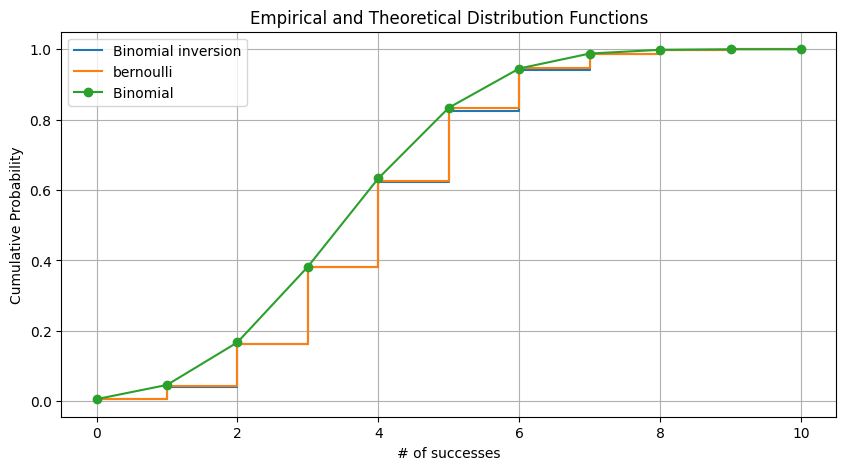

In [17]:
from random import uniform
from scipy.special import binom
from numpy import sqrt, pi, exp, tan, cumsum
from scipy.stats import probplot
import pandas as pd
import matplotlib.pyplot as plt

trial_count = 10  
success_chance = 0.4  

def flip_binomial(trial_count, success_chance):
    # adding up probabilities
    probs_stack = [binom(trial_count, idx) * (success_chance ** idx) * ((1 - success_chance) ** (trial_count - idx)) for idx in range(trial_count + 1)]  # making probability list
    probs_stack = cumsum(probs_stack) 
    # make a random number
    rand_num = uniform(0, 1)  # get a random numbr

    # check smallest idx where rand_num is smaller or same as stacked probability
    for idx, prob in enumerate(probs_stack):
        if rand_num <= prob:
            return idx  
    return trial_count  
# function to make a bernoulli sample using flip method
def flip_coin(success_chance):
    return 1 if uniform(0, 1) < success_chance else 0  # give back 1 or 0 based on random

# making 10000 samples with both ways
binom_samples = [flip_binomial(trial_count, success_chance) for _ in range(10000)]  # binomail samples with flip method
bernoulli_samples = [sum(flip_coin(success_chance) for _ in range(trial_count)) for _ in range(10000)]  # bernoulli sum sampels

# making empirical distribution functions
binom_data = pd.DataFrame(binom_samples, columns=['Outcome'])  # dataframe for binomial
bernoulli_data = pd.DataFrame(bernoulli_samples, columns=['Outcome'])  # dataframe for bernoulli

# drawing the empirical distribution functions
plt.figure(figsize=(10, 5))  # set plot size

# drawing for binomial samples made directly
binom_data['Outcome'].value_counts(normalize=True).sort_index().cumsum().plot(drawstyle='steps-post', label='Binomial inversion')  # plot binomail data

# drawing for binomial samples made using coin flips
bernoulli_data['Outcome'].value_counts(normalize=True).sort_index().cumsum().plot(drawstyle='steps-post', label='bernoulli')  # plot bernoulli data

# book theory for binomial distribution
theory_probs = cumsum([binom(trial_count, idx) * (success_chance ** idx) * ((1 - success_chance) ** (trial_count - idx)) for idx in range(trial_count + 1)])  # calculate theory probs
plt.plot(range(trial_count + 1), theory_probs, 'o-', label='Binomial ')  

plt.title('Empirical and Theoretical Distribution Functions')  
plt.xlabel('# of successes')  
plt.ylabel('Cumulative Probability')  
plt.legend() 
plt.grid(True)  
plt.show() 


__(b)__ Generate $10000$ samples from the standard normal distribution using the accept-reject method with candidate density $g(x) = (\pi(1+x^2))^{-1}$ with distribution funciton $G(x) = \tan^{-1}(x)/\pi$ from the standard Cauchy distribution. To this end, __(i)__ determine (mathematically or via simulation) the value of $c\geq1$ closest to one so that $f(x)\leq cg(x)$ for all $x$. __(ii)__ Obtain $10000$ standard normal random variables using the accept-reject method, generating Cauchy distributed random variables using inversion method. 
__(iii)__ Compare estimated and theoretical acceptance probabilities. 
__(iv)__ Generate a QQ-plot of the generated sample. 

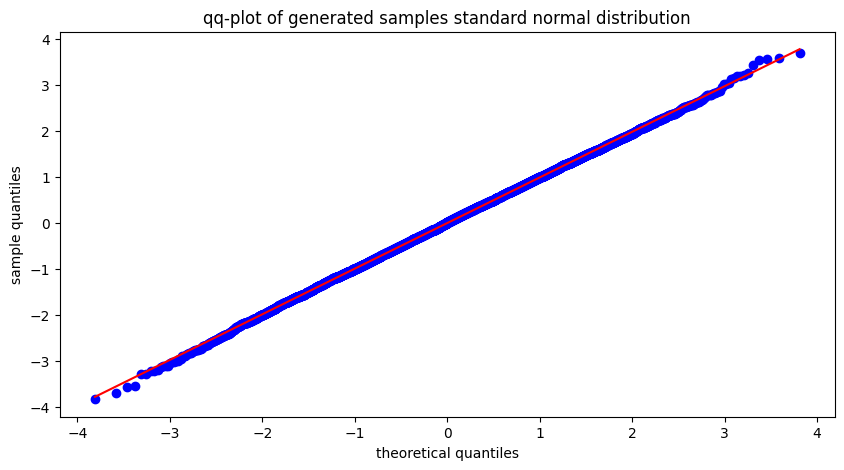

In [18]:
from random import uniform
from scipy.special import binom
from numpy import sqrt, pi, exp, tan, cumsum
from scipy.stats import probplot
import pandas as pd
import matplotlib.pyplot as plt

def find_max_ratio():
    highest = 0  # initialize highest value
    for i in range(-10000, 10000):  
        z = i / 1000  # scale z
        # calculating normal pdf
        normal_pdf = exp(-z**2 / 2) / sqrt(2 * pi) 
        # calculating cauchy pdf
        cauchy_pdf = 1 / (pi * (1 + z**2))  
        r = normal_pdf / cauchy_pdf  # find ratio
        if r > highest:
            highest = r  # update highest if current r is larger
    return highest

max_val = find_max_ratio()  # get max value

def gen_norm_samples(max_val, num=10000):
    samples = []  # list for samples
    count = 0

    while len(samples) < num:
        u = uniform(0, 1)
        z = tan(pi * (u - 0.5))  # generate cauchy variable
        normal_pdf = exp(-z**2 / 2) / sqrt(2 * pi)
        cauchy_pdf = 1 / (pi * (1 + z**2))
        a_prob = normal_pdf / (max_val * cauchy_pdf)  

        if uniform(0, 1) < a_prob:
            samples.append(z)  # add sample
        count += 1  
    est_a_prob = len(samples) / count  
    return samples, est_a_prob

norm_samps, est_a_prob = gen_norm_samples(max_val)

theor_a_prob = 1 / max_val  

plt.figure(figsize=(10, 5))
probplot(norm_samps, dist="norm", plot=plt)  # qq-plot
plt.title('qq-plot of generated samples standard normal distribution')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
plt.show()  


__Exercise 3__

The demographic makeup of regions can offer crucial insights into various socio-economic factors. For policymakers, understanding age distributions can be particularly useful, as it can provide direction for initiatives ranging from educational policy to elderly care. In this section, we will work with a dataset detailing the age distribution across United States counties, broken down into specific age bins.

The files `county_age_dist.csv`, `fips_state.csv` and `fips_county.csv` contain information about the age distribution of counties in selected brackets as well as names and [FIPS](https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt) codes and additional information. 

__(a, i)__ Merge all three data frames into one `pandas.DataFrame` object names `data` with appropriate column names. __(ii)__ Remove the `info` column. Standardize column names and entries to be capitalized according to spelling rules. Remove any preceding whitespace if present for any entries. Run: 
```
data.head(4)
```

In [19]:
import pandas as pd
state=pd.read_csv('fips_state.csv')
county=pd.read_csv('fips_county.csv')
age=pd.read_csv('county_age_dist.csv')
#first we want to load in our datasets 


### MERGE FIRST TWO DATASETS ###
state["fips"],state["state"]=state['FIPS; STATE'].str.split(";",1).str
#split the combined column into two columns for state dataset
state=state.drop(columns=['FIPS; STATE'])
#drop the combined column
county=county.drop(columns=" info")
#drop uncessary "info" column
merged_df = pd.merge(state, county, left_on=state['fips'].str[:2], right_on=county['fips'].str[:2])
#merge the two datasets on the first two digits of the fips code
merged_df=merged_df.drop(columns=['key_0'])
#drop the new column
merged_df=merged_df.drop(columns="fips_x")
#drop the fips_x column that was just for the states


### MERGE FINAL DATSET ###
merged_df['fips_y'] = merged_df['fips_y'].str.replace('\D', '', regex=True)
# remove all non-numeric characters from the fips_y column
merged_df['fips_y'] = merged_df['fips_y'].astype(int)
# convert the fips_y column to an integer so it can match the datatype in age dataset
merged_df = merged_df.rename(columns={'fips_y': 'fips'})
# rename the fips_y column to fips so we can merge it with the age dataset
data=pd.merge(merged_df, age, on='fips')
#finally we can merge the age dataset with the merged dataset based on fips

### RENAMING AND CAPITALIZING ###
data = data.rename(columns={'fips': 'Fips'})
data = data.rename(columns={' name': 'County Name'})
data = data.rename(columns={'state': 'State'})
# we are just renaming the columns to match the capitlization rules in the assignment
data['State'] = data['State'].str.title()
# capitalize the state column

data.head(4) 


/var/folders/lx/4_g1bf5951j3ls64g8b047yr0000gn/T/ipykernel_6831/2871471991.py:9: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  state["fips"],state["state"]=state['FIPS; STATE'].str.split(";",1).str
/var/folders/lx/4_g1bf5951j3ls64g8b047yr0000gn/T/ipykernel_6831/2871471991.py:9: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  state["fips"],state["state"]=state['FIPS; STATE'].str.split(";",1).str


,State,Fips,County Name,0-17,18-24,25-34,35-44,45-54,55-64,65-74,75-84,85+
0,Alabama,1001,Autauga County,25941,11422,12315,13828,14000,12697,9594,5430,1945
1,Alabama,1003,Baldwin County,86587,37568,44133,46730,49675,52405,43252,23262,8854
2,Alabama,1005,Barbour County,11057,6162,6603,5907,6490,6377,5255,2795,1074
3,Alabama,1007,Bibb County,9671,5241,5788,5472,6707,5563,4270,2555,638


__(b)__ For each county and state, compute the proportion of elderly `CPE` and `SPE` (65 and older) to the total population as well as the proportion of young people `CPY` and `SPY` (24 or younger). Add those values to the data frame. You may ignore all FIPS regions that are not in states. Run: 
```
data.head(4)
```

In [20]:
grouped_data_c = data.groupby(['State', 'County Name']).sum(numeric_only=True)
grouped_data_c['Total Population'] = grouped_data_c['0-17'] + grouped_data_c['18-24'] + grouped_data_c['35-44']+ grouped_data_c['45-54'] + grouped_data_c['55-64'] + grouped_data_c['65-74'] + grouped_data_c['75-84'] + grouped_data_c['85+']
grouped_data_c['CPY'] = (grouped_data_c['0-17'] + grouped_data_c['18-24']) / grouped_data_c['Total Population']
grouped_data_c['CPE'] = (grouped_data_c['65-74'] + grouped_data_c['75-84'] 
                         + grouped_data_c['85+']) / grouped_data_c['Total Population']
data = pd.merge(data, grouped_data_c[['CPE', 'CPY']], left_on=['State', 'County Name'], right_index=True)

grouped_data_s = data.groupby('State').sum(numeric_only=True)
grouped_data_s['Total Population'] = grouped_data_s['0-17'] + grouped_data_s['18-24'] + grouped_data_s['35-44']+ grouped_data_s['45-54'] + grouped_data_s['55-64'] + grouped_data_s['65-74'] + grouped_data_s['75-84'] + grouped_data_s['85+']
grouped_data_s['SPY'] = (grouped_data_s['0-17'] + grouped_data_s['18-24']) / grouped_data_s['Total Population']
grouped_data_s['SPE'] = (grouped_data_s['65-74'] + grouped_data_s['75-84'] 
                         + grouped_data_s['85+']) / grouped_data_s['Total Population']
data = pd.merge(data, grouped_data_s[['SPE', 'SPY']], left_on='State', right_index=True)

data.head(4)

,State,Fips,County Name,0-17,18-24,25-34,35-44,45-54,55-64,65-74,75-84,85+,CPE,CPY,SPE,SPY
0,Alabama,1001,Autauga County,25941,11422,12315,13828,14000,12697,9594,5430,1945,0.178890,0.393888,0.190766,0.389906
1,Alabama,1003,Baldwin County,86587,37568,44133,46730,49675,52405,43252,23262,8854,0.216368,0.356426,0.190766,0.389906
2,Alabama,1005,Barbour County,11057,6162,6603,5907,6490,6377,5255,2795,1074,0.202230,0.381652,0.190766,0.389906
3,Alabama,1007,Bibb County,9671,5241,5788,5472,6707,5563,4270,2555,638,0.186031,0.371713,0.190766,0.389906
